In [135]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder

In [136]:
df = pd.read_csv(r"C:\Users\eid\Downloads\train.csv")

In [137]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [138]:
df = df.drop("PassengerId" , axis=1)

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [140]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [141]:
df.isnull().sum()/891 *100

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

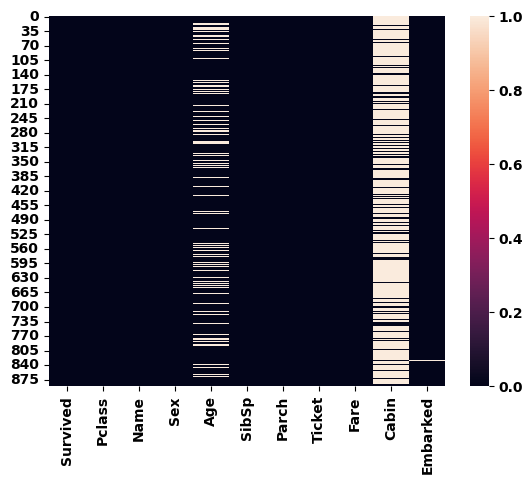

In [142]:
sns.heatmap(df.isnull())
plt.show()

### 77% of the cabin coulmn is missing so we gonna drop the column

In [143]:
df = df.drop("Cabin" , axis=1)

### only 0.2 of the embarked is missing, so i am filling it with mode

In [144]:
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [145]:
df['Embarked'].fillna("S",inplace =True)

###  i am gonna use salutation(like mr , mrs) in the name feature assign the mean age of each salutation to the respective groups 

In [146]:
df['Initial']=0
for i in df:
    df['Initial']=df.Name.str.extract('([A-Za-z]+)\.')

In [147]:
df.groupby(["Sex","Initial"])["Initial"].count()

Sex     Initial 
female  Countess      1
        Dr            1
        Lady          1
        Miss        182
        Mlle          2
        Mme           1
        Mrs         125
        Ms            1
male    Capt          1
        Col           2
        Don           1
        Dr            6
        Jonkheer      1
        Major         2
        Master       40
        Mr          517
        Rev           6
        Sir           1
Name: Initial, dtype: int64

In [148]:
# replacing ['Mlle','Mme','Ms'] with miss becuase of misspell
# replacing ['Dr','Major','Capt','Sir','Don'] with mr
# replacing ['Jonkheer','Col','Rev',] with other
df['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer'
                         ,'Col','Rev','Capt','Sir','Don'],
['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [149]:
df.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [150]:
df.loc[(df.Age.isnull())&(df["Initial"]=='Master'),'Age'] = 5
df.loc[(df.Age.isnull())&(df["Initial"]=='Miss'),'Age'] = 22
df.loc[(df.Age.isnull()&(df["Initial"]=='Mr')),'Age'] = 33
df.loc[(df.Age.isnull()&(df["Initial"]=='Mrs')),'Age'] = 36
df.loc[(df.Age.isnull()&(df["Initial"]=='Other')),'Age'] = 46

In [151]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
Initial     0
dtype: int64

### replacing 1,0 with survived and dead for better visualization

In [152]:
df2 = df.copy()
df2["Survived"].replace([1,0],["survived",'dead'], inplace=True)
df2

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Initial
0,dead,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,survived,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,dead,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,dead,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,Other
887,survived,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,Miss
888,dead,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.0,1,2,W./C. 6607,23.4500,S,Miss
889,survived,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Mr


In [153]:
df2.groupby("Survived")["Survived"].count()

Survived
dead        549
survived    342
Name: Survived, dtype: int64

### how many survived ?

In [193]:
px.pie(df2 , names="Survived",color='Survived',color_discrete_map={'dead':'#fc8317','survived':'#2596be'})

### only 38.38% of the passengers survived the crash i.e (342 passengers)

### Gender and servived

In [155]:
df2.groupby(["Sex","Survived"])["Survived"].count()

Sex     Survived
female  dead         81
        survived    233
male    dead        468
        survived    109
Name: Survived, dtype: int64

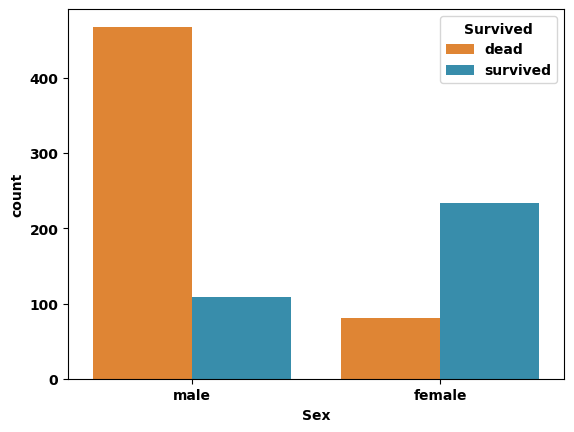

In [156]:
sns.countplot(data=df2,x="Sex",hue="Survived",palette=['#fc8317',"#2596be"]);

### although the number of men is nearly twice the number of women, the survival rates of women is 74.2% while men is only 18.9%

In [157]:
df2.groupby(["Pclass","Survived"])["Survived"].count()

Pclass  Survived
1       dead         80
        survived    136
2       dead         97
        survived     87
3       dead        372
        survived    119
Name: Survived, dtype: int64

### pclass and survived

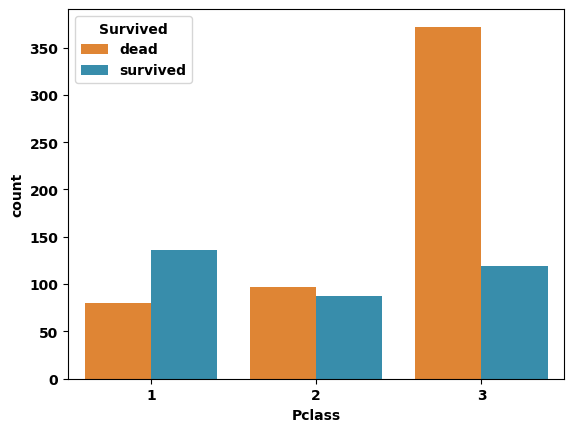

In [158]:
sns.countplot(data=df2,x="Pclass",hue="Survived",palette=['#fc8317',"#2596be"]);

### the survival rates of Pclass 1 is 63% , Pclass 2 is 47.2% ,Pclass 3 is 24.23% while Pclass 3 have a large number of passengers , the priorty while rescue was given to Pclass1

### age and survived

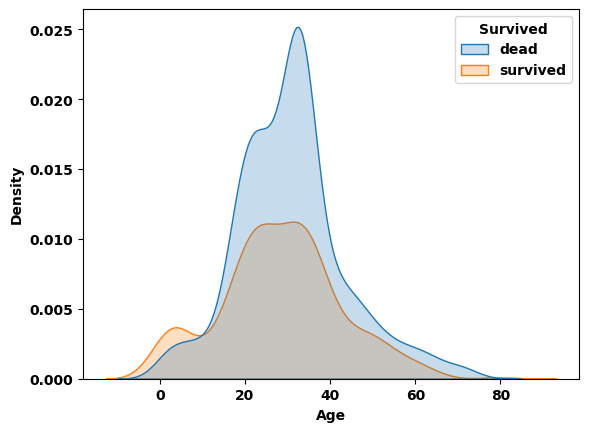

In [159]:
sns.kdeplot(data=df2 , x = "Age",fill=True, hue= 'Survived' );

### survived by pclass and age

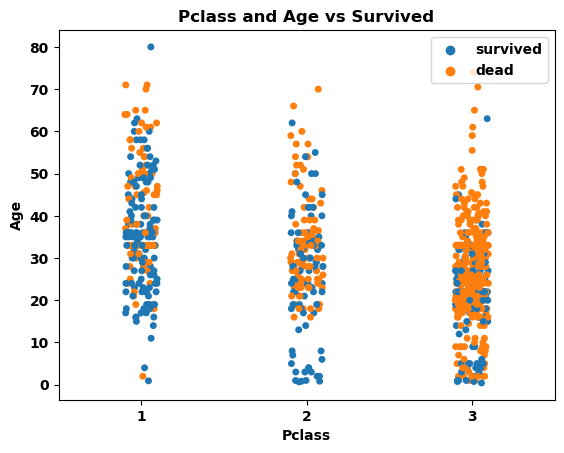

In [160]:
sns.stripplot(x='Pclass', y='Age', hue='Survived', data=df2)
plt.title('Pclass and Age vs Survived')
plt.legend(loc='upper right')
plt.show()

In [161]:
df2.groupby(["Pclass","Survived",(df2["Age"] <= 10)])["Survived"].count()

Pclass  Survived  Age  
1       dead      False     79
                  True       1
        survived  False    134
                  True       2
2       dead      False     97
        survived  False     70
                  True      17
3       dead      False    345
                  True      27
        survived  False     98
                  True      21
Name: Survived, dtype: int64

### the number of passengers below 10 increase with Pclass and their survival rates are high irrespective of the Pclass

### survived by age and gender

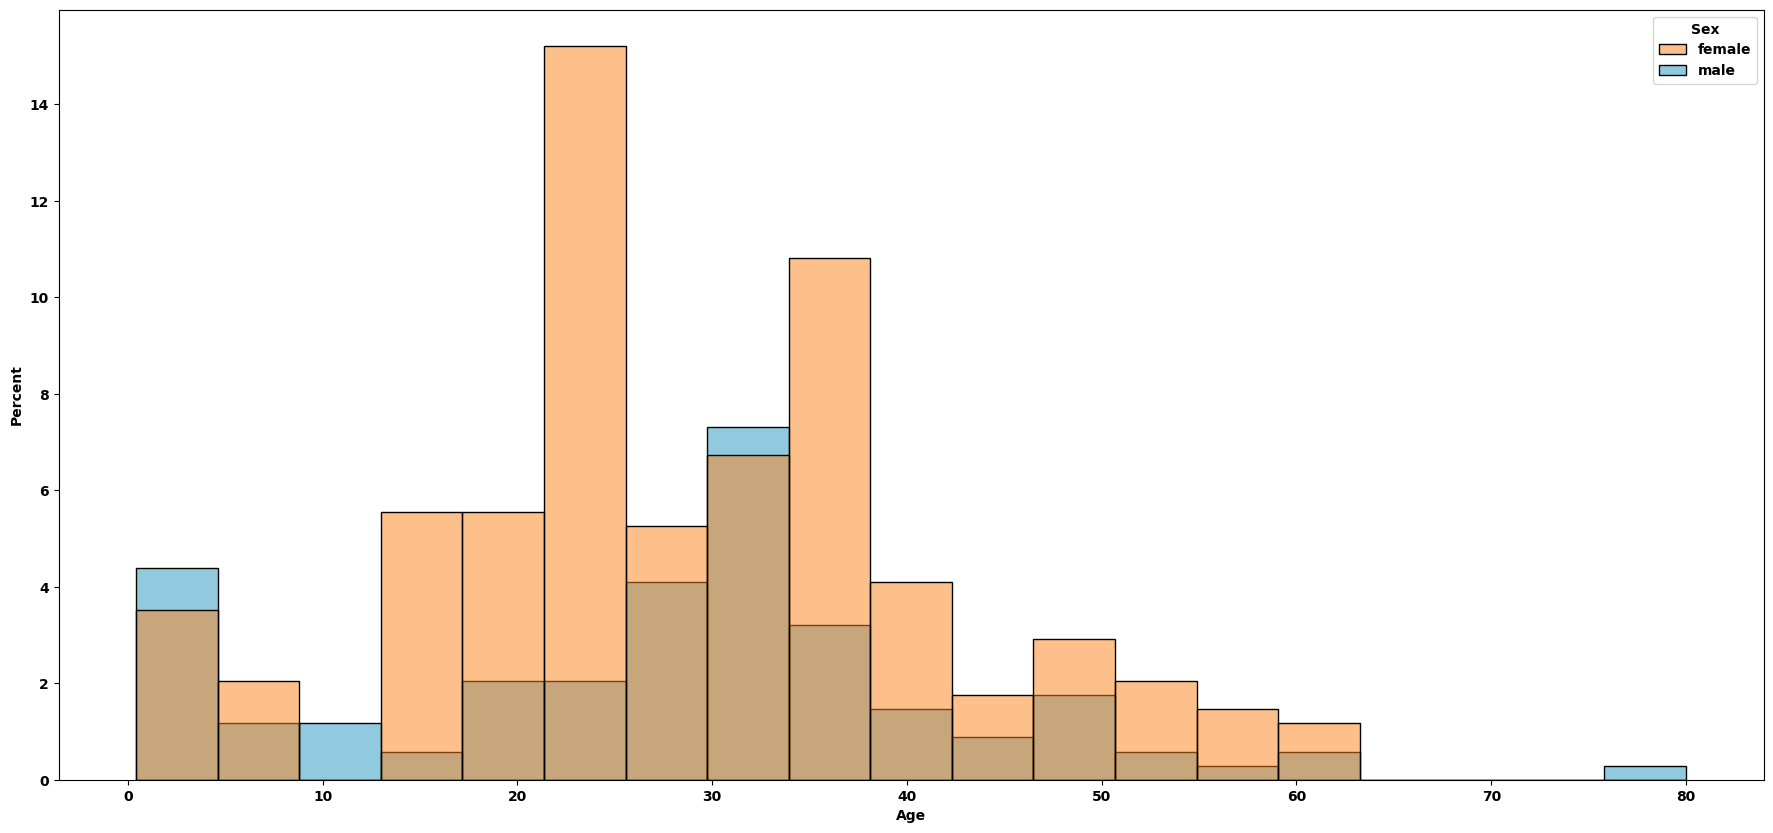

In [162]:
fig, ax = plt.subplots (figsize= (22, 10))
palette =['#fc8317','#2596be']
sns.histplot(data=df2.loc[ (df2['Survived'] =='survived')] , x ="Age" ,hue = "Sex" , stat="percent",
             palette=palette);

### the survival rates for men decrease with an increase in Age
### the highest survival rates is for women in Pclass1

### Embarked and survived

In [163]:
df2.groupby("Embarked")["Survived"].value_counts(normalize = True) *100

Embarked  Survived
C         survived    55.357143
          dead        44.642857
Q         dead        61.038961
          survived    38.961039
S         dead        66.099071
          survived    33.900929
Name: Survived, dtype: float64

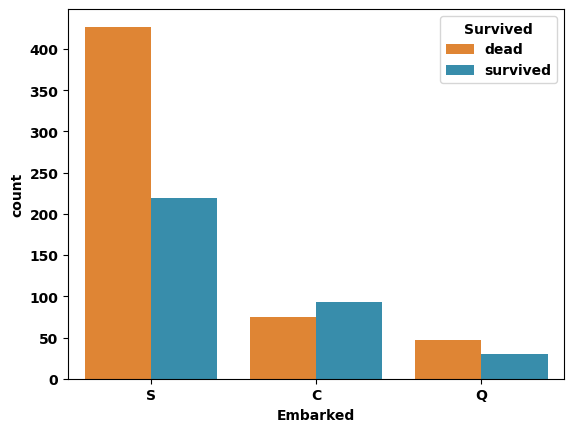

In [164]:
sns.countplot(data=df2,x="Embarked", hue="Survived",palette=['#fc8317',"#2596be"]);

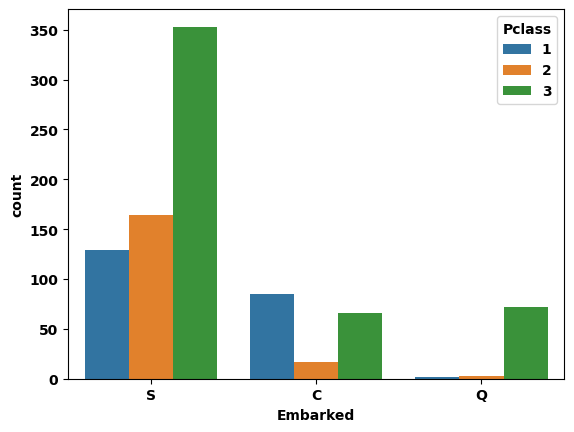

In [165]:
sns.countplot(data=df2,x="Embarked", hue="Pclass");

### sipsp and survived

In [166]:
df2.groupby(["SibSp","Survived"])["Survived"].count()

SibSp  Survived
0      dead        398
       survived    210
1      dead         97
       survived    112
2      dead         15
       survived     13
3      dead         12
       survived      4
4      dead         15
       survived      3
5      dead          5
8      dead          7
Name: Survived, dtype: int64

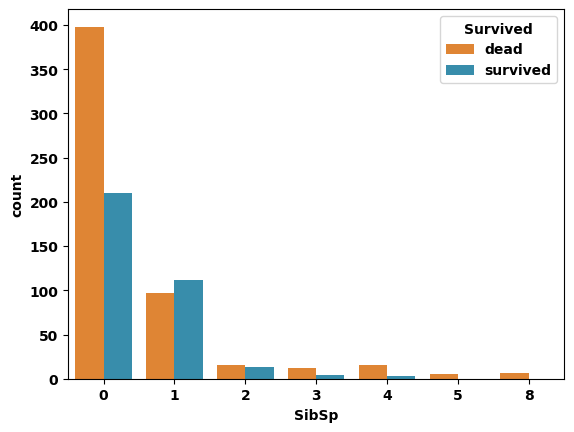

In [167]:
sns.countplot(data=df2,x="SibSp",hue="Survived",palette=['#fc8317',"#2596be"]);

In [168]:
df2.groupby(["SibSp","Pclass"])["Survived"].count()

SibSp  Pclass
0      1         137
       2         120
       3         351
1      1          71
       2          55
       3          83
2      1           5
       2           8
       3          15
3      1           3
       2           1
       3          12
4      3          18
5      3           5
8      3           7
Name: Survived, dtype: int64

### the survival rates for passenger with no siblings is 34.5% and the number decrease with the increase of the number of siblings increase.
### All the families that have more siblings than 3 were all in Pclass3 , that's why survival rates for families more than 4 is 0%. 

### Parch and survived

In [169]:
df2.groupby(["Parch","Survived"])["Survived"].count()

Parch  Survived
0      dead        445
       survived    233
1      dead         53
       survived     65
2      dead         40
       survived     40
3      dead          2
       survived      3
4      dead          4
5      dead          4
       survived      1
6      dead          1
Name: Survived, dtype: int64

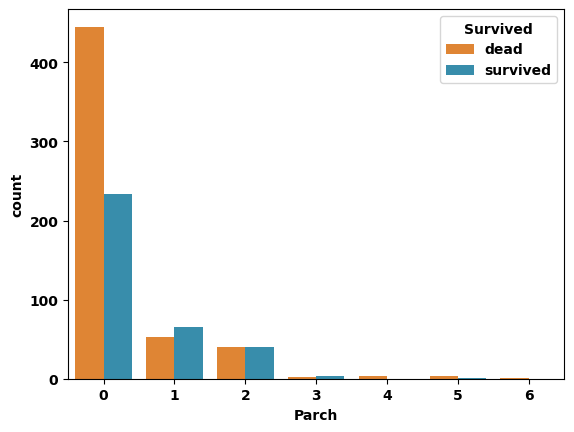

In [170]:
sns.countplot(data=df2,x="Parch",hue="Survived",palette=['#fc8317',"#2596be"]);

In [171]:
df2.groupby(["Parch","Pclass"])["Survived"].count()

Parch  Pclass
0      1         163
       2         134
       3         381
1      1          31
       2          32
       3          55
2      1          21
       2          16
       3          43
3      2           2
       3           3
4      1           1
       3           3
5      3           5
6      3           1
Name: Survived, dtype: int64

### the results similar to sipsp

### Correlation

In [172]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked', 'Initial'],
      dtype='object')

In [173]:
cols = ['Pclass', 'Sex',
        'Embarked']
df[cols] = df[cols].apply(LabelEncoder().fit_transform)
cols = ['Pclass', 'Sex',
        'Embarked']
df2[cols] = df2[cols].apply(LabelEncoder().fit_transform)

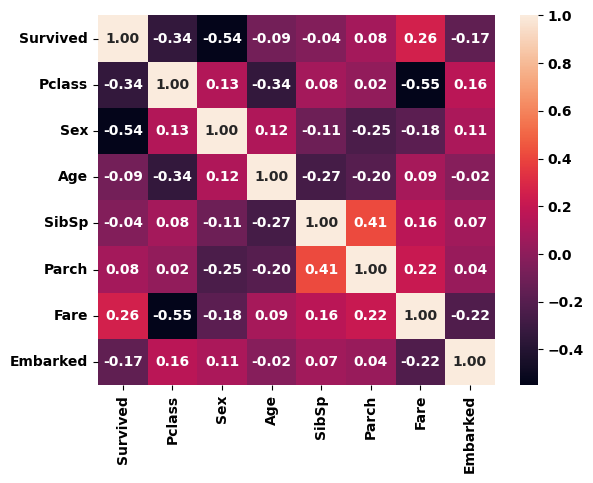

In [174]:
sns.heatmap(df.corr(), annot = True ,fmt='0.2f')
plt.show()

In [181]:
from sklearn.model_selection import train_test_split
x=df.drop(['Survived',"Name","Initial","Ticket"],axis=1).values
y=df['Survived'].values
coulmns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked']

In [182]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

In [183]:
from sklearn.metrics import accuracy_score
from tpot import TPOTClassifier

In [184]:
tpot = TPOTClassifier(generations=15 , verbosity=2 )

In [185]:
tpot.fit(x_train, y_train)

Optimization Progress:   0%|          | 0/1600 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8281935483870967

Generation 2 - Current best internal CV score: 0.8282064516129033

Generation 3 - Current best internal CV score: 0.8298064516129031

Generation 4 - Current best internal CV score: 0.8298064516129031

Generation 5 - Current best internal CV score: 0.8298193548387098

Generation 6 - Current best internal CV score: 0.8330322580645161

Generation 7 - Current best internal CV score: 0.8330322580645161

Generation 8 - Current best internal CV score: 0.8330322580645161

Generation 9 - Current best internal CV score: 0.8346451612903225

Generation 10 - Current best internal CV score: 0.8346451612903225

Generation 11 - Current best internal CV score: 0.8346451612903225

Generation 12 - Current best internal CV score: 0.836258064516129

Generation 13 - Current best internal CV score: 0.836258064516129

Generation 14 - Current best internal CV score: 0.836258064516129

Generation 15 - Current best internal CV score: 0.836258064

TPOTClassifier(generations=15, verbosity=2)

In [186]:
print(tpot.score(x_test, y_test))

0.7947761194029851


In [187]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,2 hours 33 mins
H2O_cluster_timezone:,Africa/Cairo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.1
H2O_cluster_version_age:,22 days
H2O_cluster_name:,H2O_from_python_eid_28c1kp
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.918 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


In [188]:
data = h2o.H2OFrame(df2, destination_frame = "hf")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [189]:
train, valid = data.split_frame(ratios=[0.7])

In [190]:
aml = H2OAutoML( max_models=10, nfolds=5,
                balance_classes=True, sort_metric="AUC", seed=123)

In [191]:
aml.train(x=coulmns, y='Survived', training_frame=train, validation_frame=valid)

AutoML progress: |
16:13:36.454: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
16:13:36.455: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),5/5
# GBM base models (used / total),1/1
# DRF base models (used / total),2/2
# GLM base models (used / total),1/1
# DeepLearning base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [192]:
aml.leaderboard.head(20)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_1_AutoML_4_20230713_161336,0.86533,0.426469,0.832268,0.181693,0.364315,0.132725
StackedEnsemble_AllModels_1_AutoML_4_20230713_161336,0.859881,0.430212,0.822767,0.184955,0.365287,0.133435
GBM_5_AutoML_4_20230713_161336,0.858142,0.434748,0.833821,0.189502,0.367447,0.135017
GBM_2_AutoML_4_20230713_161336,0.85657,0.438217,0.821596,0.178307,0.368111,0.135506
GBM_4_AutoML_4_20230713_161336,0.855793,0.437136,0.8278,0.178652,0.367008,0.134695
GBM_grid_1_AutoML_4_20230713_161336_model_1,0.854259,0.436486,0.825854,0.194768,0.367127,0.134783
XRT_1_AutoML_4_20230713_161336,0.852882,0.469225,0.803228,0.198181,0.387166,0.149897
GBM_3_AutoML_4_20230713_161336,0.849317,0.446357,0.818971,0.184139,0.372269,0.138584
DRF_1_AutoML_4_20230713_161336,0.845278,0.547401,0.809646,0.209128,0.377514,0.142517
GLM_1_AutoML_4_20230713_161336,0.844997,0.456614,0.807079,0.224012,0.381608,0.145624
